In [136]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [195]:
df=pd.read_csv('./res/df_inne_choosen')
print(df.columns)
X=df.drop(['Moda'],axis=1)
y=df['Moda']
scaler=MinMaxScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
print(X.columns)
X=X_scaled

Index(['Moda', 'Wzrost', 'gry_czas', 'Zajecie__sluchanie muzyki',
       'Wakacje__Praca', 'Rod_prz_sam__Przyjaciele', 'Napoj__soki',
       'Napoj__woda'],
      dtype='object')
Index(['Wzrost', 'gry_czas', 'Zajecie__sluchanie muzyki', 'Wakacje__Praca',
       'Rod_prz_sam__Przyjaciele', 'Napoj__soki', 'Napoj__woda'],
      dtype='object')


In [194]:
print(X['Wzrost'].value_counts)

KeyError: 'Wzrost'

In [201]:
tree=DecisionTreeClassifier()
param_grid={
    'min_samples_leaf':list(range(1,5,1)),
    'max_depth':list(range(1,22,1)),
    'criterion':['gini','entropy'],
    'min_samples_split':list(range(1,7,1)),
    'min_impurity_decrease':[float(x)for x in np.linspace(0,0.1,10)],
    'class_weight':['balanced']
}


In [202]:
searcher=GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,scoring='f1_weighted',n_jobs=5)
searcher.fit(X,y)

print(f"Najlepsze hiperparametry: {searcher.best_params_}")
print(f"Najlepszy wynik: {searcher.best_score_}")


Najlepsze hiperparametry: {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.03333333333333333, 'min_samples_leaf': 1, 'min_samples_split': 2}
Najlepszy wynik: 0.7046349206349206


/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8400 fits failed out of a total of 50400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/mysza/pythonProject/.venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    vali

In [203]:
from sklearn.model_selection import cross_val_score
cv_tree=DecisionTreeClassifier(** {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.03333333333333333, 'min_samples_leaf': 1, 'min_samples_split': 2}
,random_state=5)
scores=cross_val_score(cv_tree,X,y,cv=5,scoring='f1_weighted')
print(f"Wyniki cross-validation: {scores}")
print(f"Średnia f1: {scores.mean()}")


Wyniki cross-validation: [0.81746032 0.45238095 0.76190476 0.52222222 0.78666667]
Średnia f1: 0.6681269841269841


In [229]:
from sklearn.model_selection import train_test_split

testing_tree=DecisionTreeClassifier(** {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.03333333333333333, 'min_samples_leaf': 2, 'min_samples_split': 2}


,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
testing_tree.fit(X_train,y_train)
y_predict=testing_tree.predict(X_test)
print(f1_score(y_test,y_predict,average='weighted'))


0.6666666666666666


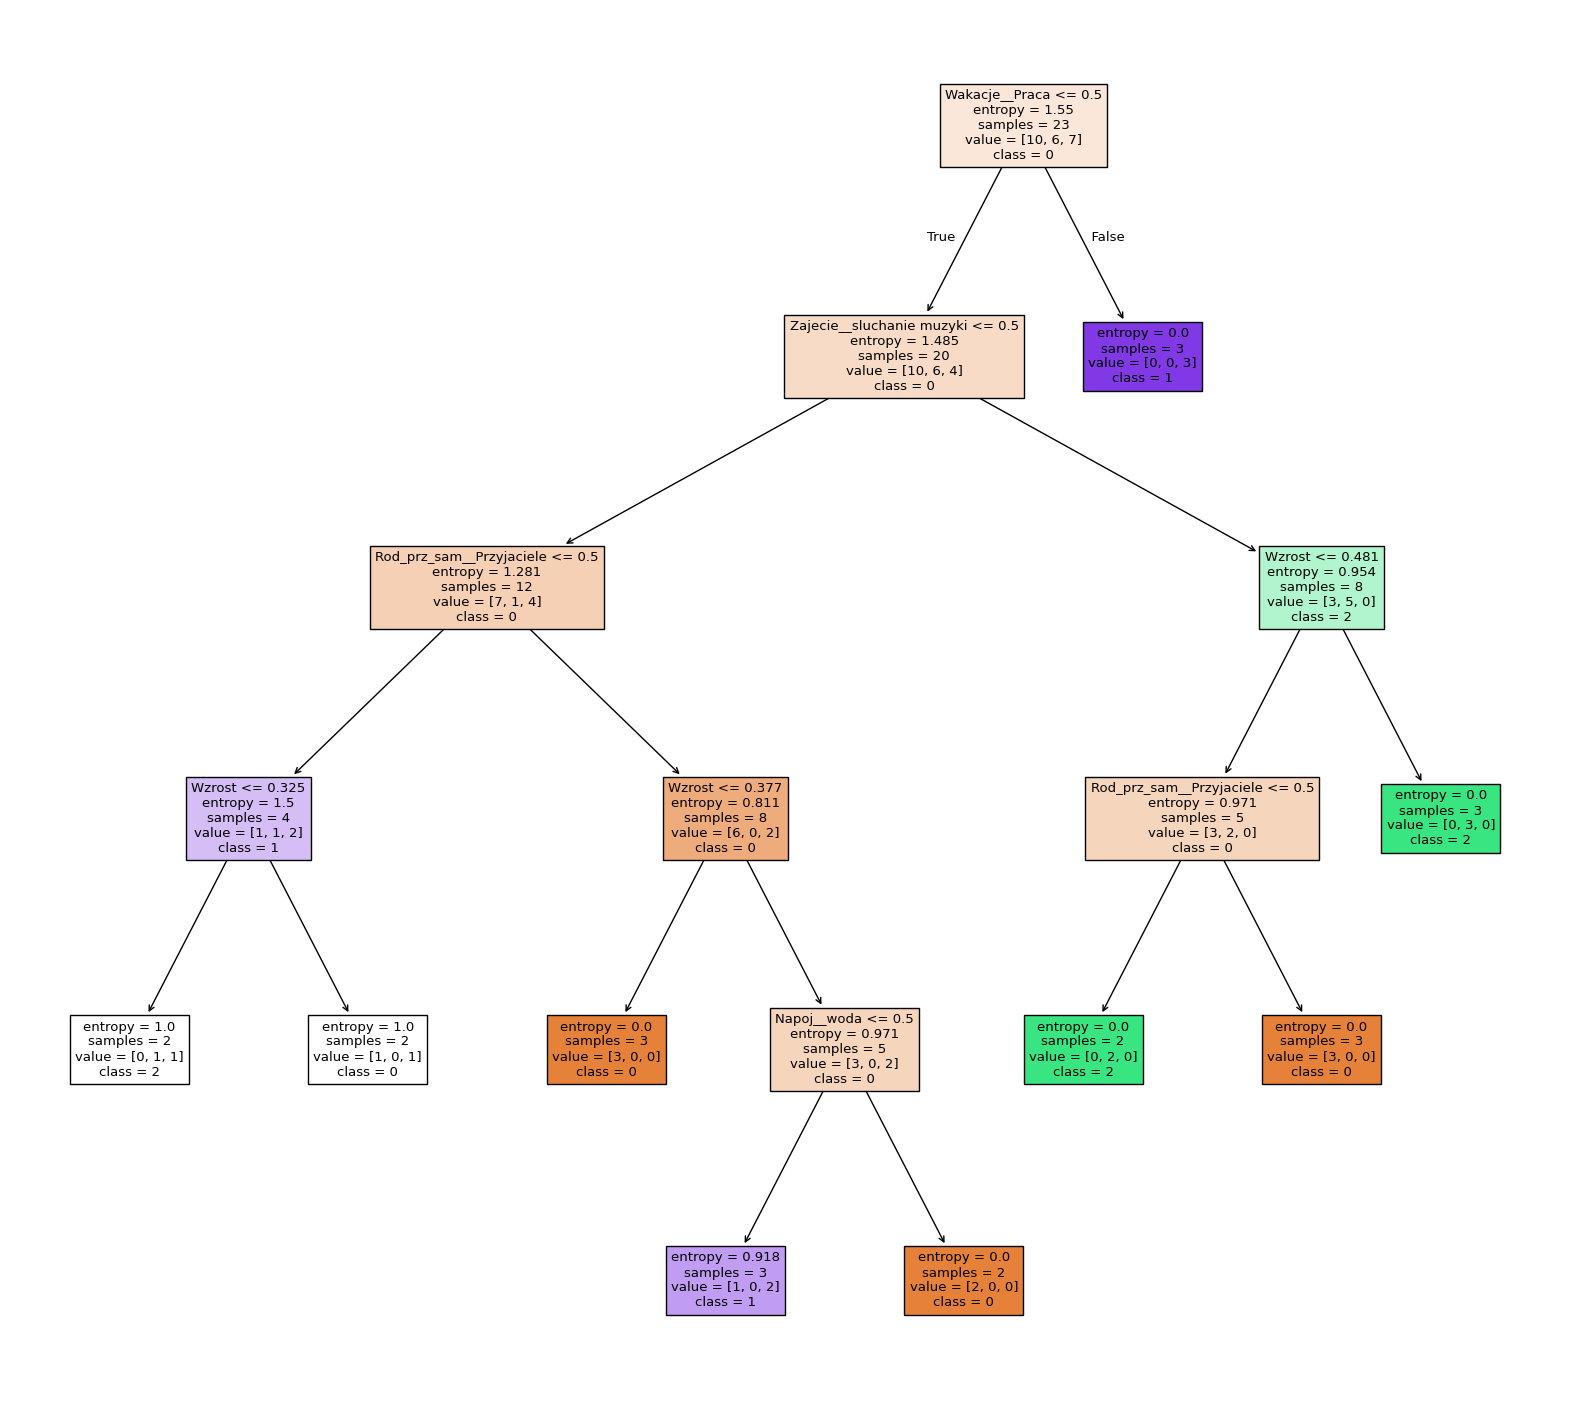

In [230]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 18))
targe_values=df['Moda'].unique()

plot_tree(testing_tree, filled=True, feature_names=X.columns, class_names=[str(int(x)) for x in targe_values])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

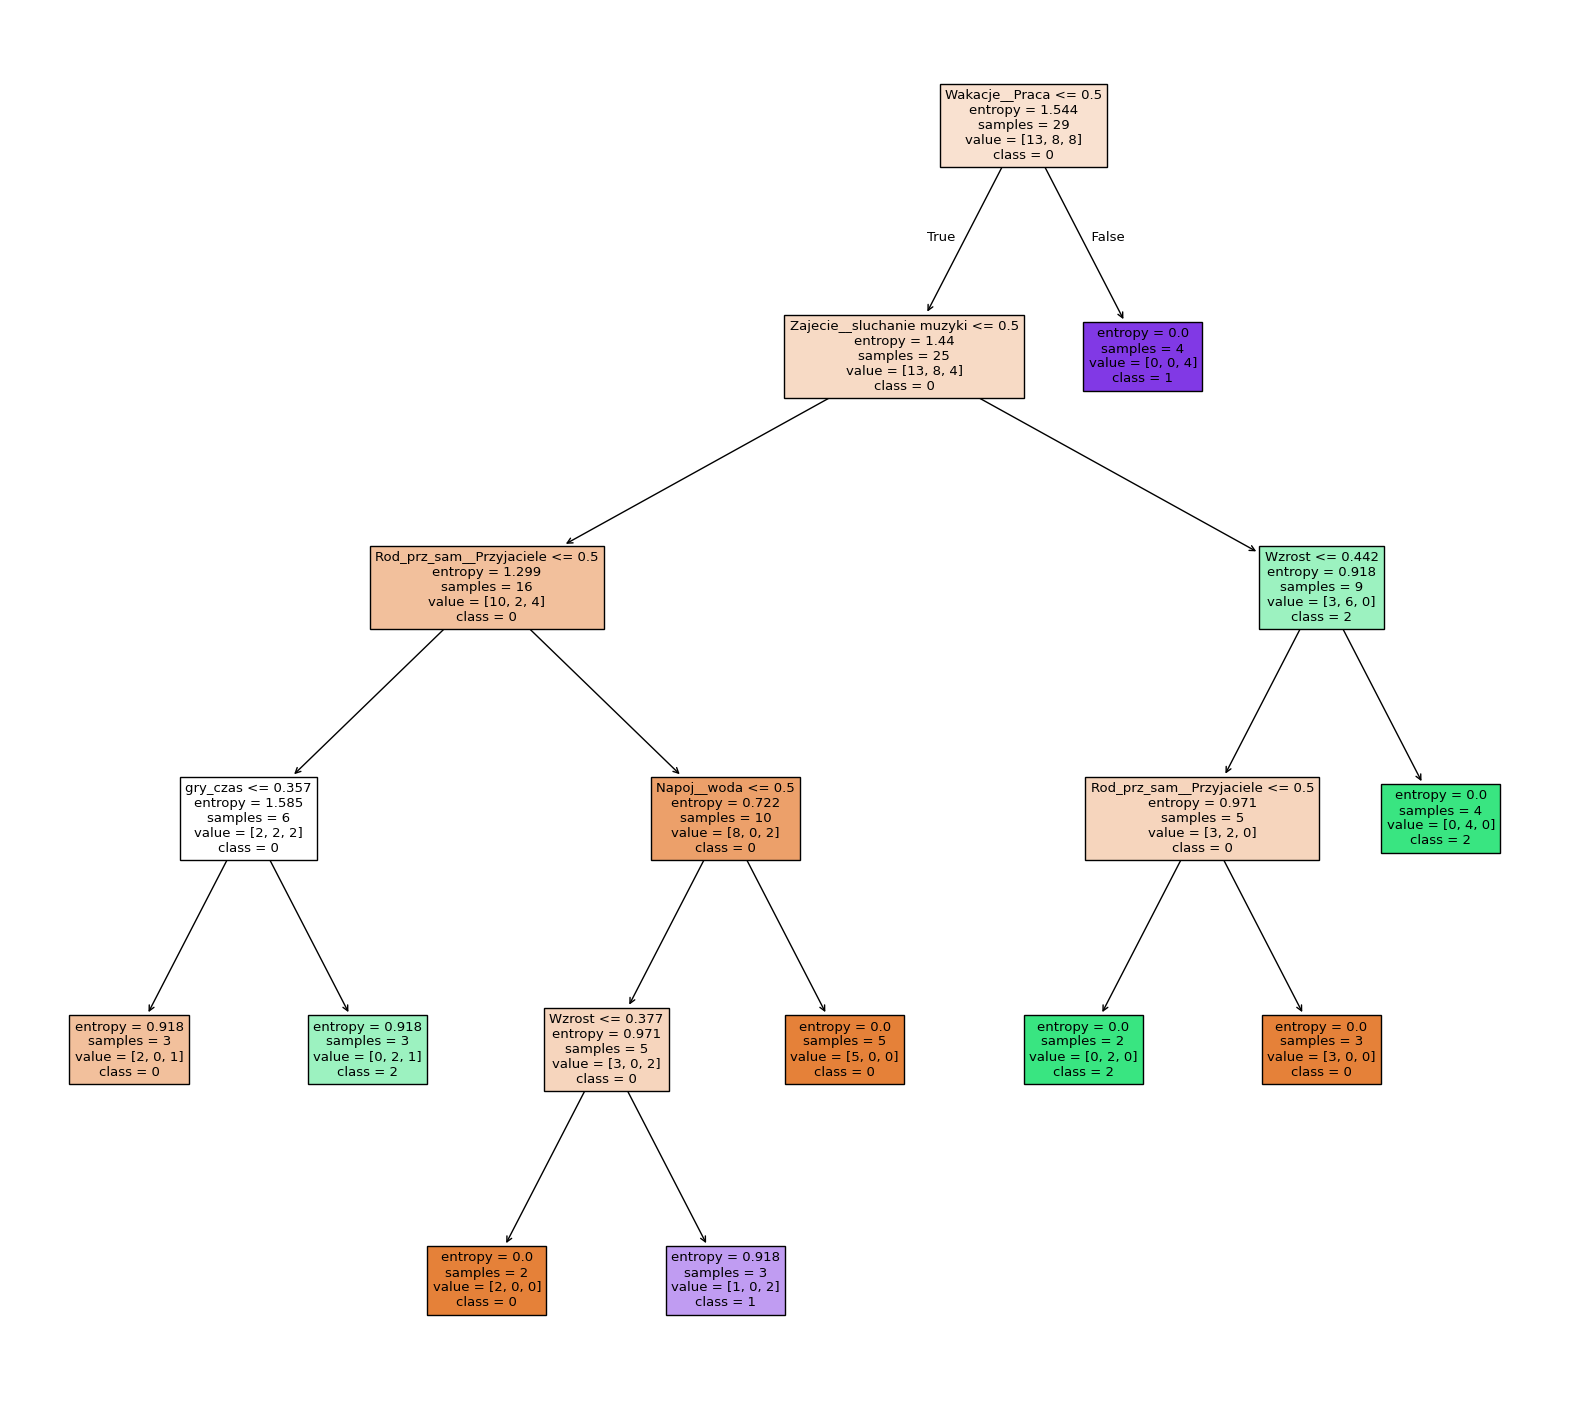

In [228]:
final_tree=DecisionTreeClassifier(** {'criterion': 'entropy', 'max_depth': 14, 'min_impurity_decrease': 0.03333333333333333, 'min_samples_leaf': 2, 'min_samples_split': 2}

,random_state=5)
final_tree.fit(X,y)
plt.figure(figsize=(20, 18))

plot_tree(final_tree,filled=True,feature_names=X.columns,class_names=[str(int(x)) for x in targe_values])
plt.show

In [231]:
from joblib import dump
dump(final_tree,'normalized_final_Decision_tree_gini_data_entropy_param.joblib')
dump(testing_tree,'normalized_testing_Decision_tree_gini_data_entropy_param.joblib')

['normalized_testing_Decision_tree_gini_data_entropy_param.joblib']